#### 1) Data Understanding

* 1) Understand Columns
* 2) check datatypes
* 3) describe numerical columns
* 4) describe categorical columns

In [564]:
#1) Understand Columns
import pandas as pd 
import numpy as np
import re
df = pd.read_csv('property_data_08152025_v2.csv')
df

url  \
0      https://www.nawy.com/compound/1572-fcc/propert...   
1      https://www.nawy.com/compound/38-hyde-park/pro...   
2      https://www.nawy.com/compound/728-lasirena-pal...   
3      https://www.nawy.com/compound/1219-nurai/prope...   
4      https://www.nawy.com/compound/260-v-residences...   
...                                                  ...   
90138  https://www.nawy.com/compound/10-mountain-view...   
90139  https://www.nawy.com/compound/544-serrano/prop...   
90140  https://www.nawy.com/compound/927-salt/propert...   
90141  https://www.nawy.com/compound/165-jefaira/prop...   
90142  https://www.nawy.com/compound/408-parklane/pro...   

                                                logo_url  \
0      https://prod-images.cooingestate.com/processed...   
1      https://prod-images.cooingestate.com/processed...   
2      https://prod-images.cooingestate.com/processed...   
3      https://prod-images.cooingestate.com/processed...   
4      https://prod-images.cooingestate.com/processed...   
...                                                  ...   
90138  https://prod-images.cooingestate.com/processed...   
90139  https://prod-images.cooingestate.com/processed...   
90140  https://prod-images.cooingestate.com/processed...   
90141  https://prod-images.cooingestate.com/processed...   
90142  https://prod-images.cooingestate.com/processed...   

                            developer_url  \
0      https://www.nawy.com/developer/125   
1       https://www.nawy.com/developer/15   
2      https://www.nawy.com/developer/215   
3      https://www.nawy.com/developer/168   
4        https://www.nawy.com/developer/8   
...                                   ...   
90138    https://www.nawy.com/developer/6   
90139  https://www.nawy.com/developer/136   
90140   https://www.nawy.com/developer/33   
90141   https://www.nawy.com/developer/13   
90142  https://www.nawy.com/developer/109   

                                  developer_name  \
0      Al - Borouj Misr Developments Group (ABM)   
1                                      Hyde Park   
2                                 Lasirena Group   
3                            Mercon Developments   
4                                          SODIC   
...                                          ...   
90138                              Mountain View   
90139                                   New Plan   
90140                               Tatweer Misr   
90141                              Inertia Egypt   
90142                           El Attal Holding   

                                          property_title property_type  \
0      Office for sale in FCC in Golden Square by Al ...        Office   
1      Villa 4 bedrooms for resale in Hyde Park in Ne...         Villa   
2      Apartment for sale in Lasirena Palm Beach with...     Apartment   
3      Retail for sale in Nurai - Nurai Walk - in New...        Retail   
4      Penthouse 4 bedrooms for resale in V Residence...     Penthouse   
...                                                  ...           ...   
90138  Townhouse for sale in Mountain View October Pa...     Townhouse   
90139      Serrano - Apartment - 1 bedroom -ground floor     Apartment   
90140  Chalet for sale in Salt with 3 bedrooms in Nor...        Chalet   
90141  Chalet for sale in Jefaira with 4 bedrooms in ...        Chalet   
90142                                    Parklane-Office        Office   

                                                location  status  \
0                              FCC, Golden Square, Egypt     NaN   
1                            Hyde Park, New Cairo, Egypt     NaN   
2                 Lasirena Palm Beach, Ain Sokhna, Egypt     NaN   
3                                 Nurai, El Lotus, Egypt     NaN   
4         V Residences By Villette, Golden Square, Egypt     NaN   
...                                                  ...     ...   
90138  Mountain View October Park, 6th of October Cit...     NaN   
90139       

In [565]:
#2) check datatypes
df.dtypes
#reference_no -> object
#price -> float64
#property_size -> float64

url                         object
logo_url                    object
developer_url               object
developer_name              object
property_title              object
property_type               object
location                    object
status                     float64
reference_no               float64
bedrooms                   float64
bathrooms                  float64
compound                    object
sale_type                   object
finishing                   object
description                 object
phone_placeholder          float64
country_flag_url           float64
message_box_placeholder    float64
price                       object
image_urls                  object
payment_plan_raw           float64
payment_plan               float64
amenities                   object
delivery_in                 object
property_size               object
dtype: object

In [566]:
#reference_no -> object
df['reference_no'].unique()

array([83320.,  7004., 31976., ..., 35724., 32647., 12837.],
      shape=(89679,))

In [567]:
df['reference_no'] = (
    df['reference_no']
    .dropna()                   # avoid NaN casting error
    .astype(int)                # remove .0
    .astype(str)                # convert to string
)

# For NaN rows, fill them back as None/string if needed:
df['reference_no'] = df['reference_no'].replace("nan", None)

In [568]:
df['reference_no'].astype(str)


0        83320
1         7004
2        31976
3        63905
4        75110
         ...  
90138    34660
90139     6523
90140    35724
90141    32647
90142    12837
Name: reference_no, Length: 90143, dtype: object

In [569]:
#delivery_in ->int
df['delivery_in'] = pd.to_numeric(df['delivery_in'], errors='coerce')
df['delivery_in'] = df['delivery_in'].fillna(df['delivery_in'].median())
df['delivery_in'] = df['delivery_in'].astype(int)
df['delivery_in'].dtypes


dtype('int64')

In [570]:
#price -> float64
df['price'].unique()

array([nan, '30,000,000EGP', '25,069,000EGP', ..., '10,989,825EGP',
       '11,066,250EGP', '31,131,216EGPMax Price:31,713,108EGP'],
      shape=(11890,), dtype=object)

In [571]:
#price -> float64
#'30,000,000EGP'&  '31,131,216EGPMax Price:31,713,108EGP
def format_price(arg):
    if pd.isna(arg):
        return None
    
    # Extract all numbers in the string
    numbers = re.findall(r'\d+', str(arg))
    numbers = [int(num) for num in numbers]
    
    if not numbers:   # nothing found
        return None
    
    # If two numbers → average, else take single number
    return sum(numbers) / len(numbers)

df['price'] = df['price'].apply(format_price)
df['price']

0         NaN
1         NaN
2         NaN
3         NaN
4        10.0
         ... 
90138     NaN
90139     NaN
90140     NaN
90141     NaN
90142     NaN
Name: price, Length: 90143, dtype: float64

In [572]:
#property_size -> float64

def format_property_size(arg):
    if pd.isna(arg):
        return None
    
    # Extract numbers
    numbers = re.findall(r'\d+', str(arg))
    numbers = [float(num) for num in numbers]
    
    if not numbers:
        return None
    
    # If range (e.g., 120–150) → average, else single value
    return sum(numbers) / len(numbers)

df['property_size'] = df['property_size'].apply(format_property_size)
df['property_size']

0          NaN
1          NaN
2          NaN
3          NaN
4        198.0
         ...  
90138      NaN
90139      NaN
90140      NaN
90141      NaN
90142      NaN
Name: property_size, Length: 90143, dtype: float64

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90143 entries, 0 to 90142
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      90143 non-null  object 
 1   logo_url                 90143 non-null  object 
 2   developer_url            90143 non-null  object 
 3   developer_name           90031 non-null  object 
 4   property_title           90143 non-null  object 
 5   property_type            89952 non-null  object 
 6   location                 89952 non-null  object 
 7   status                   0 non-null      float64
 8   reference_no             89952 non-null  object 
 9   bedrooms                 76072 non-null  float64
 10  bathrooms                72748 non-null  float64
 11  compound                 89952 non-null  object 
 12  sale_type                89952 non-null  object 
 13  finishing                88668 non-null  object 
 14  description           

In [574]:
# * 3) describe numerical columns
df.describe()

status      bedrooms     bathrooms  phone_placeholder  \
count     0.0  76072.000000  72748.000000                0.0   
mean      NaN      2.846724      2.959215                NaN   
std       NaN      1.002834      1.209165                NaN   
min       NaN      1.000000     -4.000000                NaN   
25%       NaN      2.000000      2.000000                NaN   
50%       NaN      3.000000      3.000000                NaN   
75%       NaN      3.000000      3.000000                NaN   
max       NaN     45.000000     45.000000                NaN   

       country_flag_url  message_box_placeholder         price  \
count               0.0                      0.0  18621.000000   
mean                NaN                      NaN    213.419705   
std                 NaN                      NaN    148.201430   
min                 NaN                      NaN      0.666667   
25%                 NaN                      NaN     99.000000   
50%                 NaN                      NaN    198.000000   
75%                 NaN                      NaN    306.000000   
max                 NaN                      NaN    689.333333   

       payment_plan_raw  payment_plan   delivery_in  property_size  
count               0.0           0.0  90143.000000   18596.000000  
mean                NaN           NaN   2026.994597     181.401027  
std                 NaN           NaN      1.314791     125.317037  
min                 NaN           NaN   2025.000000      12.000000  
25%                 NaN           NaN   2027.000000     118.000000  
50%                 NaN           NaN   2027.000000     160.000000  
75%                 NaN           NaN   2027.000000     215.000000  
max                 NaN           NaN   2077.000000    7382.000000

In [575]:
df[df['bathrooms'] == -4]

url  \
9368  https://www.nawy.com/compound/5-marassi/proper...   

                                               logo_url  \
9368  https://prod-images.cooingestate.com/processed...   

                         developer_url developer_name  \
9368  https://www.nawy.com/developer/4     Emaar Misr   

                     property_title property_type  \
9368  The Greek Village - Apartment     Apartment   

                               location  status reference_no  bedrooms  ...  \
9368  Marassi, Sidi Abdel Rahman, Egypt     NaN         2123       3.0  ...   

      phone_placeholder country_flag_url message_box_placeholder price  \
9368                NaN              NaN                     NaN   NaN   

                                             image_urls  payment_plan_raw  \
9368  ['https://prod-images.cooingestate.com/process...               NaN   

      payment_plan                                          amenities  \
9368           NaN  Infrastructure, Livability, Clubhouse, Commerc...   

      delivery_in property_size  
9368         2027           NaN  

[1 rows x 25 columns]

In [576]:
drop_index = df[df['bathrooms'] == -4].index
df.drop(drop_index, axis=0, inplace=True)

In [577]:
# * 3) describe numerical columns
df.describe()

status      bedrooms     bathrooms  phone_placeholder  \
count     0.0  76071.000000  72747.000000                0.0   
mean      NaN      2.846722      2.959311                NaN   
std       NaN      1.002841      1.208898                NaN   
min       NaN      1.000000     -3.000000                NaN   
25%       NaN      2.000000      2.000000                NaN   
50%       NaN      3.000000      3.000000                NaN   
75%       NaN      3.000000      3.000000                NaN   
max       NaN     45.000000     45.000000                NaN   

       country_flag_url  message_box_placeholder         price  \
count               0.0                      0.0  18621.000000   
mean                NaN                      NaN    213.419705   
std                 NaN                      NaN    148.201430   
min                 NaN                      NaN      0.666667   
25%                 NaN                      NaN     99.000000   
50%                 NaN                      NaN    198.000000   
75%                 NaN                      NaN    306.000000   
max                 NaN                      NaN    689.333333   

       payment_plan_raw  payment_plan   delivery_in  property_size  
count               0.0           0.0  90142.000000   18596.000000  
mean                NaN           NaN   2026.994597     181.401027  
std                 NaN           NaN      1.314799     125.317037  
min                 NaN           NaN   2025.000000      12.000000  
25%                 NaN           NaN   2027.000000     118.000000  
50%                 NaN           NaN   2027.000000     160.000000  
75%                 NaN           NaN   2027.000000     215.000000  
max                 NaN           NaN   2077.000000    7382.000000

In [578]:
df[df['bathrooms'] == -3]

url  \
78239  https://www.nawy.com/compound/222-district-5/p...   

                                                logo_url  \
78239  https://prod-images.cooingestate.com/processed...   

                           developer_url developer_name  \
78239  https://www.nawy.com/developer/65        Marakez   

                    property_title property_type  \
78239  Plateau - Apartment Typical     Apartment   

                                 location  status reference_no  bedrooms  ...  \
78239  DISTRICT 5, South New Cairo, Egypt     NaN         4210       1.0  ...   

       phone_placeholder country_flag_url message_box_placeholder price  \
78239                NaN              NaN                     NaN   NaN   

                                              image_urls  payment_plan_raw  \
78239  ['https://prod-images.cooingestate.com/process...               NaN   

       payment_plan                                amenities  delivery_in  \
78239           NaN  Clubhouse, Medical center, Business Hub         2025   

      property_size  
78239           NaN  

[1 rows x 25 columns]

In [579]:
drop_index = df[df['bathrooms'] == -3].index
df.drop(drop_index, axis=0, inplace=True)

In [580]:
#soldout 
df[df['bathrooms'] == 45]


url  \
57766  https://www.nawy.com/compound/6-mivida/propert...   

                                                logo_url  \
57766  https://prod-images.cooingestate.com/processed...   

                          developer_url developer_name  \
57766  https://www.nawy.com/developer/4     Emaar Misr   

                                          property_title property_type  \
57766  Apartment 45 bedrooms for resale in Mivida in ...     Apartment   

                       location  status reference_no  bedrooms  ...  \
57766  Mivida, New Cairo, Egypt     NaN         3872      45.0  ...   

       phone_placeholder country_flag_url message_box_placeholder price  \
57766                NaN              NaN                     NaN   NaN   

      image_urls  payment_plan_raw  payment_plan  \
57766        NaN               NaN           NaN   

                                               amenities  delivery_in  \
57766  Clubhouse, Livability, Infrastructure, Schools...         2027   

      property_size  
57766           NaN  

[1 rows x 25 columns]

In [581]:
# * 4) describe categorical columns
df.describe(include="O")

url  \
count                                               90141   
unique                                              89868   
top     https://www.nawy.com/compound/864-boho-el-sokh...   
freq                                                    2   

                                                 logo_url  \
count                                               90141   
unique                                                363   
top     https://prod-images.cooingestate.com/processed...   
freq                                                 7186   

                            developer_url           developer_name  \
count                               90141                    90029   
unique                                295                      295   
top     https://www.nawy.com/developer/16  Palm Hills Developments   
freq                                 7201                     7195   

                                           property_title property_type  \
count                                               90141         89950   
unique                                              17905            27   
top     Apartment for sale in Bloomfields  with 3 bedr...     Apartment   
freq                                                  431         38422   

                                               location reference_no  \
count                                             89950        89950   
unique                                             1281        89676   
top     Mountain View ICity New Cairo, New Cairo, Egypt        46544   
freq                                               1757            2   

                             compound       sale_type finishing  \
count                           89950           89950     88666   
unique                           1281               3         5   
top     Mountain View ICity New Cairo  Developer Sale  Finished   
freq                             1757           68882     42586   

                                              description  \
count                                               89720   
unique                                              47510   
top     A Retail in Taj Tower  by Taj Misr Development...   
freq                                                  425   

                                               image_urls amenities  
count                                               86793     56699  
unique                                              55493       882  
top     ['https://prod-images.cooingestate.com/process...    Garden  
freq                                                  149      7485

In [582]:
# desc
cat_cols = df.select_dtypes(include='O').columns
for col in cat_cols:
    print(f"col name \'{col}\' has nuniques = {df[col].nunique()}") 
    print(f"uniques:\n{df[col].unique()}")
    print()
    print("*" * 50)
    print()

col name 'url' has nuniques = 89868
uniques:
['https://www.nawy.com/compound/1572-fcc/property/83320-office-for-sale-in-fcc-in-golden-square-by-al-borouj-misr-developments-group-abm'
 'https://www.nawy.com/compound/38-hyde-park/property/7004-hyde-park-4-bedrooms-villa'
 'https://www.nawy.com/compound/728-lasirena-palm-beach/property/31976-apartment-for-sale-in-lasirena-palm-beach-with-2-bedrooms-in-ain-sokhna-by-lasirena-group'
 ...
 'https://www.nawy.com/compound/927-salt/property/35724-chalet-for-sale-in-salt-with-3-bedrooms-in-north-coast-by-tatweer-misr'
 'https://www.nawy.com/compound/165-jefaira/property/32647-chalet-for-sale-in-jefaira-with-4-bedrooms-in-north-coast-by-inertia-egypt'
 'https://www.nawy.com/compound/408-parklane/property/12837-parklane-office']

**************************************************

col name 'logo_url' has nuniques = 363
uniques:
['https://prod-images.cooingestate.com/processed/developer/logo_image/125/medium.webp'
 'https://prod-images.cooingestate

In [583]:
for col in cat_cols:
    print(f"col name \'{col}\' count of each unique is\n{df[col].value_counts()}")
    print()
    print("*" * 50)
    print()

col name 'url' count of each unique is
url
https://www.nawy.com/compound/864-boho-el-sokhna/property/91247-chalet-for-sale-in-boho-el-sokhna                                                                                       2
https://www.nawy.com/compound/494-entrada/property/6074-entrada-apartment-garden                                                                                                        2
https://www.nawy.com/compound/4-uptown-cairo/property/64741-twinhouse-for-sale-at-uptown-cairo                                                                                          2
https://www.nawy.com/compound/1505-jirian-mountain-view/property/87633-nile-cascades-residences-for-sale-in-jirian-mountain-view-with-3-bedrooms-in-el-sheikh-zayed-by-mountain-view    2
https://www.nawy.com/compound/532-ayla-jefaira/property/71876-apartment-for-sale-in-ayla-jefaira-with-2-bedrooms-in-ras-el-hekma-by-inertia-egypt                                       2
                           

In [584]:
df

url  \
0      https://www.nawy.com/compound/1572-fcc/propert...   
1      https://www.nawy.com/compound/38-hyde-park/pro...   
2      https://www.nawy.com/compound/728-lasirena-pal...   
3      https://www.nawy.com/compound/1219-nurai/prope...   
4      https://www.nawy.com/compound/260-v-residences...   
...                                                  ...   
90138  https://www.nawy.com/compound/10-mountain-view...   
90139  https://www.nawy.com/compound/544-serrano/prop...   
90140  https://www.nawy.com/compound/927-salt/propert...   
90141  https://www.nawy.com/compound/165-jefaira/prop...   
90142  https://www.nawy.com/compound/408-parklane/pro...   

                                                logo_url  \
0      https://prod-images.cooingestate.com/processed...   
1      https://prod-images.cooingestate.com/processed...   
2      https://prod-images.cooingestate.com/processed...   
3      https://prod-images.cooingestate.com/processed...   
4      https://prod-images.cooingestate.com/processed...   
...                                                  ...   
90138  https://prod-images.cooingestate.com/processed...   
90139  https://prod-images.cooingestate.com/processed...   
90140  https://prod-images.cooingestate.com/processed...   
90141  https://prod-images.cooingestate.com/processed...   
90142  https://prod-images.cooingestate.com/processed...   

                            developer_url  \
0      https://www.nawy.com/developer/125   
1       https://www.nawy.com/developer/15   
2      https://www.nawy.com/developer/215   
3      https://www.nawy.com/developer/168   
4        https://www.nawy.com/developer/8   
...                                   ...   
90138    https://www.nawy.com/developer/6   
90139  https://www.nawy.com/developer/136   
90140   https://www.nawy.com/developer/33   
90141   https://www.nawy.com/developer/13   
90142  https://www.nawy.com/developer/109   

                                  developer_name  \
0      Al - Borouj Misr Developments Group (ABM)   
1                                      Hyde Park   
2                                 Lasirena Group   
3                            Mercon Developments   
4                                          SODIC   
...                                          ...   
90138                              Mountain View   
90139                                   New Plan   
90140                               Tatweer Misr   
90141                              Inertia Egypt   
90142                           El Attal Holding   

                                          property_title property_type  \
0      Office for sale in FCC in Golden Square by Al ...        Office   
1      Villa 4 bedrooms for resale in Hyde Park in Ne...         Villa   
2      Apartment for sale in Lasirena Palm Beach with...     Apartment   
3      Retail for sale in Nurai - Nurai Walk - in New...        Retail   
4      Penthouse 4 bedrooms for resale in V Residence...     Penthouse   
...                                                  ...           ...   
90138  Townhouse for sale in Mountain View October Pa...     Townhouse   
90139      Serrano - Apartment - 1 bedroom -ground floor     Apartment   
90140  Chalet for sale in Salt with 3 bedrooms in Nor...        Chalet   
90141  Chalet for sale in Jefaira with 4 bedrooms in ...        Chalet   
90142                                    Parklane-Office        Office   

                                                location  status reference_no  \
0                              FCC, Golden Square, Egypt     NaN        83320   
1                            Hyde Park, New Cairo, Egypt     NaN         7004   
2                 Lasirena Palm Beach, Ain Sokhna, Egypt     NaN        31976   
3                                 Nurai, El Lotus, Egypt     NaN        63905   
4         V Residences By Villette, Golden Square, Egypt     NaN        75110   
...                                                  ...     ...      

In [585]:
df.drop(['status', 'phone_placeholder', 'country_flag_url', 'message_box_placeholder','image_urls','payment_plan_raw','payment_plan','description'], axis=1, inplace=True)
df

url  \
0      https://www.nawy.com/compound/1572-fcc/propert...   
1      https://www.nawy.com/compound/38-hyde-park/pro...   
2      https://www.nawy.com/compound/728-lasirena-pal...   
3      https://www.nawy.com/compound/1219-nurai/prope...   
4      https://www.nawy.com/compound/260-v-residences...   
...                                                  ...   
90138  https://www.nawy.com/compound/10-mountain-view...   
90139  https://www.nawy.com/compound/544-serrano/prop...   
90140  https://www.nawy.com/compound/927-salt/propert...   
90141  https://www.nawy.com/compound/165-jefaira/prop...   
90142  https://www.nawy.com/compound/408-parklane/pro...   

                                                logo_url  \
0      https://prod-images.cooingestate.com/processed...   
1      https://prod-images.cooingestate.com/processed...   
2      https://prod-images.cooingestate.com/processed...   
3      https://prod-images.cooingestate.com/processed...   
4      https://prod-images.cooingestate.com/processed...   
...                                                  ...   
90138  https://prod-images.cooingestate.com/processed...   
90139  https://prod-images.cooingestate.com/processed...   
90140  https://prod-images.cooingestate.com/processed...   
90141  https://prod-images.cooingestate.com/processed...   
90142  https://prod-images.cooingestate.com/processed...   

                            developer_url  \
0      https://www.nawy.com/developer/125   
1       https://www.nawy.com/developer/15   
2      https://www.nawy.com/developer/215   
3      https://www.nawy.com/developer/168   
4        https://www.nawy.com/developer/8   
...                                   ...   
90138    https://www.nawy.com/developer/6   
90139  https://www.nawy.com/developer/136   
90140   https://www.nawy.com/developer/33   
90141   https://www.nawy.com/developer/13   
90142  https://www.nawy.com/developer/109   

                                  developer_name  \
0      Al - Borouj Misr Developments Group (ABM)   
1                                      Hyde Park   
2                                 Lasirena Group   
3                            Mercon Developments   
4                                          SODIC   
...                                          ...   
90138                              Mountain View   
90139                                   New Plan   
90140                               Tatweer Misr   
90141                              Inertia Egypt   
90142                           El Attal Holding   

                                          property_title property_type  \
0      Office for sale in FCC in Golden Square by Al ...        Office   
1      Villa 4 bedrooms for resale in Hyde Park in Ne...         Villa   
2      Apartment for sale in Lasirena Palm Beach with...     Apartment   
3      Retail for sale in Nurai - Nurai Walk - in New...        Retail   
4      Penthouse 4 bedrooms for resale in V Residence...     Penthouse   
...                                                  ...           ...   
90138  Townhouse for sale in Mountain View October Pa...     Townhouse   
90139      Serrano - Apartment - 1 bedroom -ground floor     Apartment   
90140  Chalet for sale in Salt with 3 bedrooms in Nor...        Chalet   
90141  Chalet for sale in Jefaira with 4 bedrooms in ...        Chalet   
90142                                    Parklane-Office        Office   

                                                location reference_no  \
0                              FCC, Golden Square, Egypt        83320   
1                            Hyde Park, New Cairo, Egypt         7004   
2                 Lasirena Palm Beach, Ain Sokhna, Egypt        31976   
3                                 Nurai, El Lotus, Egypt        63905   
4         V Residences By Villette, Golden Square, Egypt        75110   
...                                                  ...          ...   
90138  Mountain View October Park, 6th of Oct

#### 2) EDA

* uni-variate
* bi-variate
* multi-variate

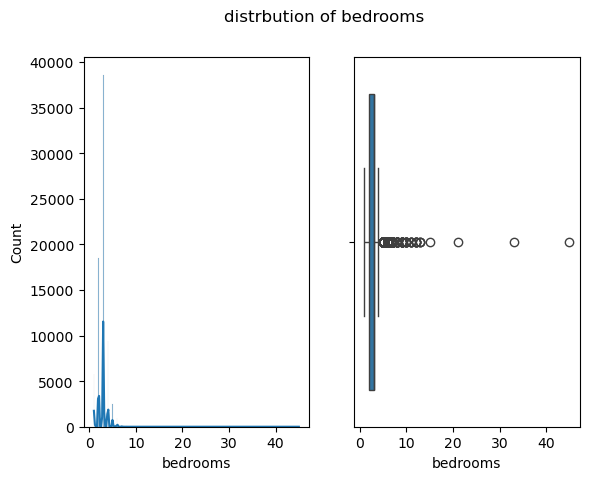

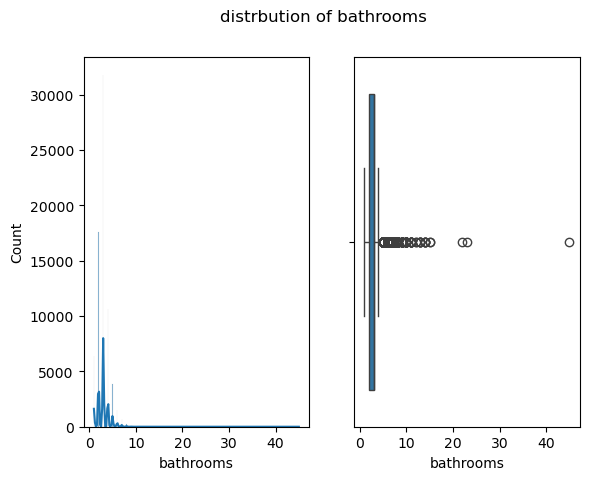

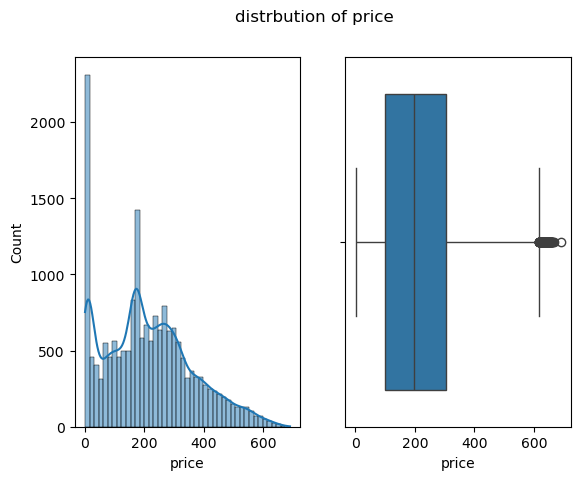

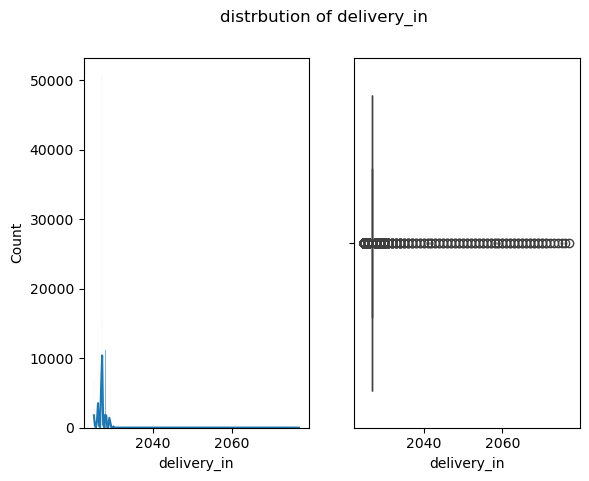

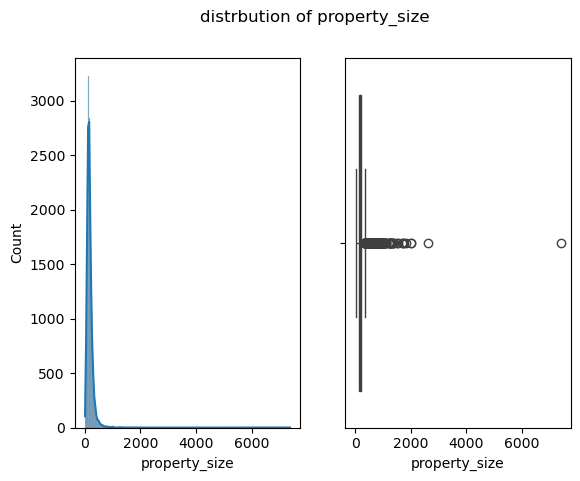

In [586]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# * Uni-variate

### NUMERIC
num_cols = df.select_dtypes('number').columns
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(f'distrbution of {col}')
    ### histogram
    sns.histplot(df[col], kde=True, ax=axes[0])

    ### boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    plt.show()

In [587]:
#### Categorical
# pie < 7
# countplot [7, 20]
# >20 top_10

cat_cols = df.select_dtypes("O").columns
cat_cols = cat_cols.drop(['url','logo_url', 'developer_url', 'property_title', 'reference_no'])

for col in cat_cols:
    if df[col].nunique() <= 7:
        fig = px.pie(df, names=df[col], title=f"Distribution of {col}")

    elif df[col].nunique() < 20:
        fig = px.histogram(df, x=col, title=f"Distribution of {col}")

    else: # top 10
        dff = df[col].value_counts().head(10).reset_index()
        dff.columns = [col, 'count']
        fig = px.bar(dff, x=col, y='count', title=f"Top 10 Distribution of {col}")
    
    fig.show()

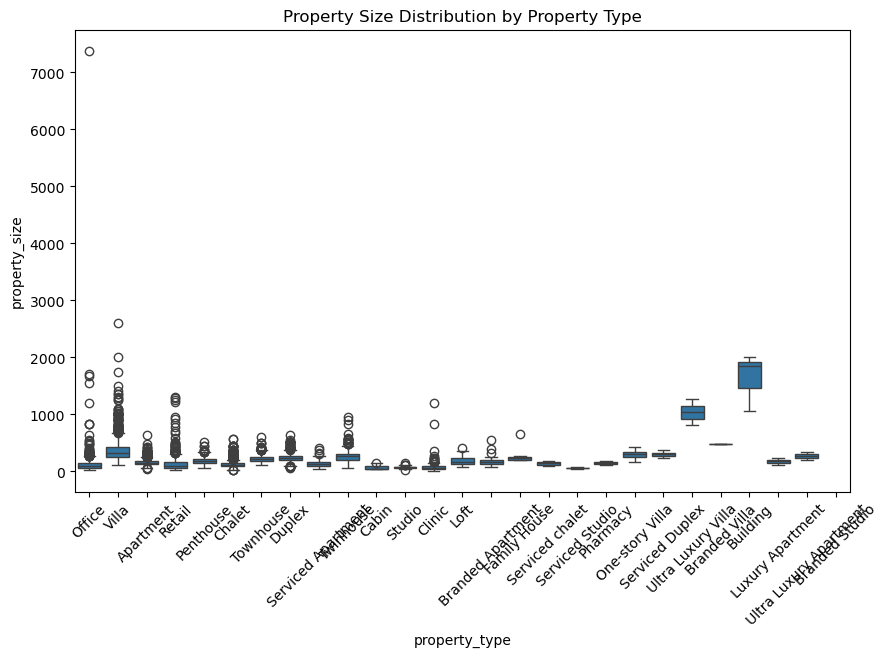

In [588]:
#### Bi-Variate Analysis
#1)Property Type vs Property Size
# x: property_type (categorical)
# y: property_size (numeric)

plt.figure(figsize=(10,6))
sns.boxplot(x="property_type", y="property_size", data=df)
plt.xticks(rotation=45)
plt.title("Property Size Distribution by Property Type")
plt.show()


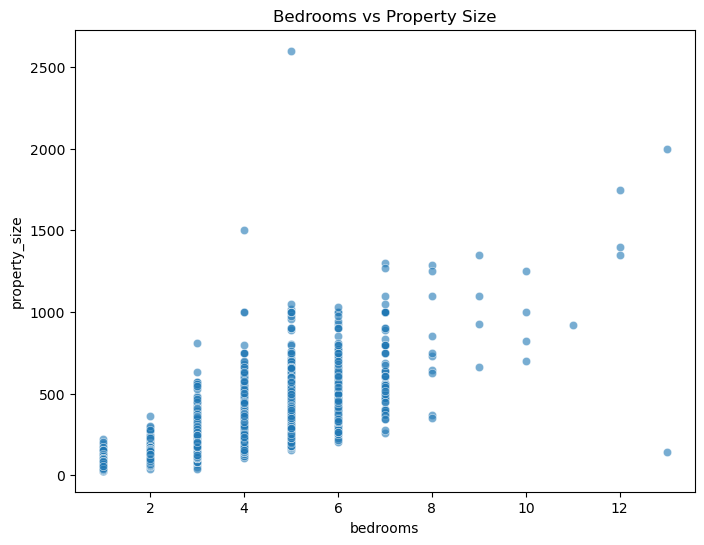

In [589]:
#2) Bedrooms vs Property Size
# x: bedrooms (numeric)
# y: property_size (numeric)

plt.figure(figsize=(8,6))
sns.scatterplot(x="bedrooms", y="property_size", data=df, alpha=0.6)
plt.title("Bedrooms vs Property Size")
plt.show()


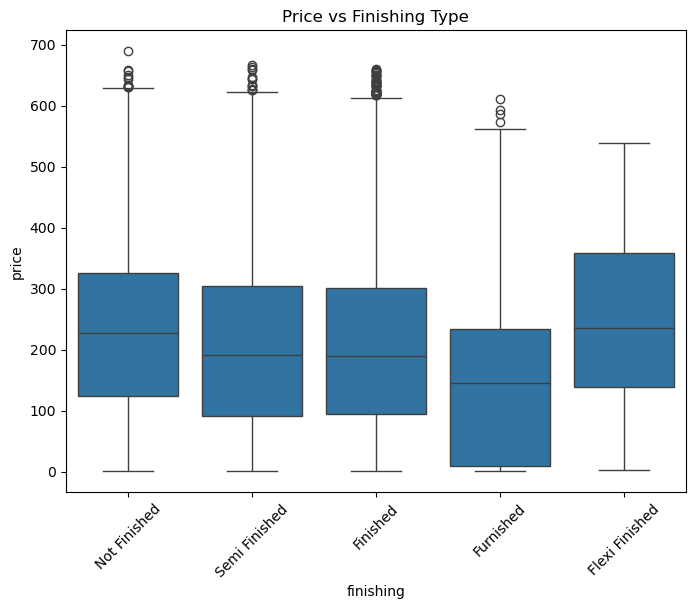

In [590]:
#3)Finishing Type vs Price
# x: finishing (categorical)
# y: price (numeric)

plt.figure(figsize=(8,6))
sns.boxplot(x="finishing", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price vs Finishing Type")
plt.show()


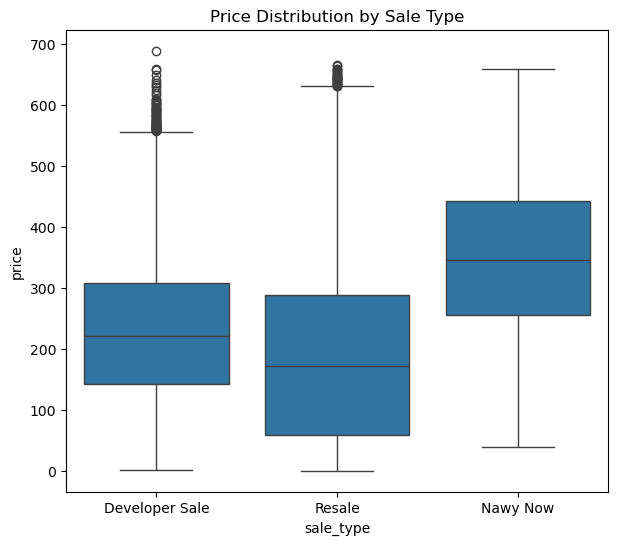

In [591]:
#4)Sale Type vs Price
# x: sale_type (categorical)
# y: price (numeric)

plt.figure(figsize=(7,6))
sns.boxplot(x="sale_type", y="price", data=df)
plt.title("Price Distribution by Sale Type")
plt.show()


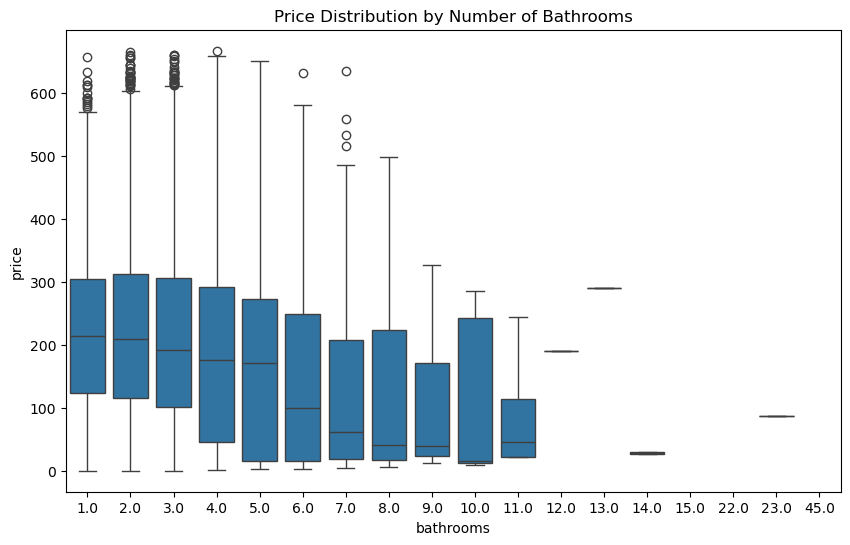

In [592]:
#5)Bathrooms vs Price
# x: bathrooms (numeric)
# y: price (numeric)

plt.figure(figsize=(10,6))
sns.boxplot(x="bathrooms", y="price", data=df)
plt.title("Price Distribution by Number of Bathrooms")
plt.show()


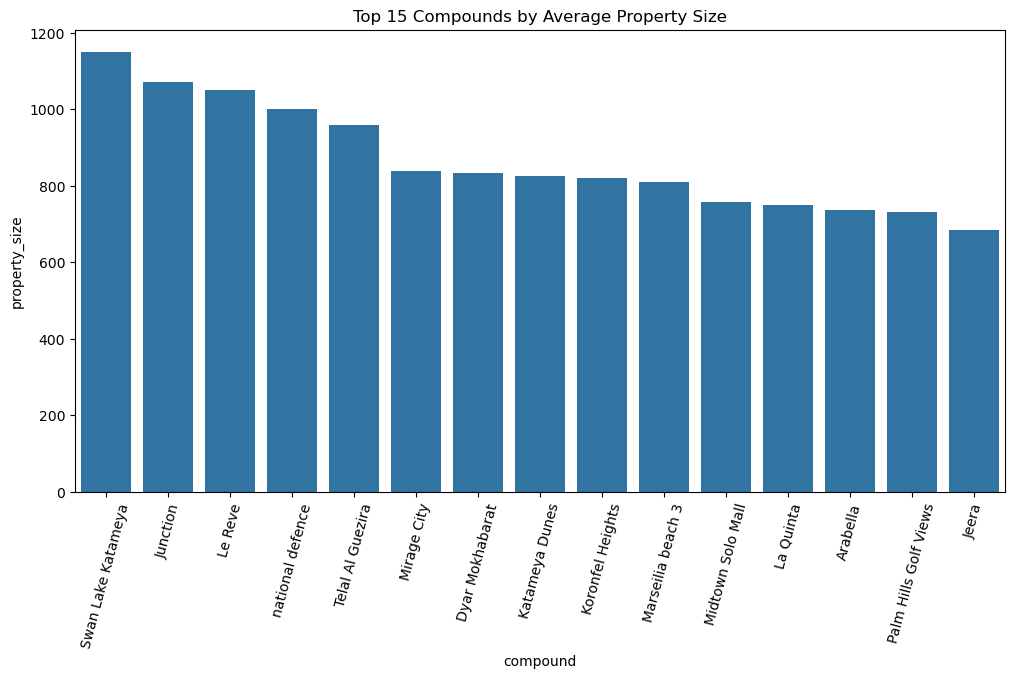

In [593]:
#6)Compound vs Average Property Size
# x: compound (categorical)
# y: average_property_size (numeric)

compound_size = df.groupby("compound")["property_size"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="compound", y="property_size", 
            data=compound_size.sort_values("property_size", ascending=False).head(15))
plt.xticks(rotation=75)
plt.title("Top 15 Compounds by Average Property Size")
plt.show()


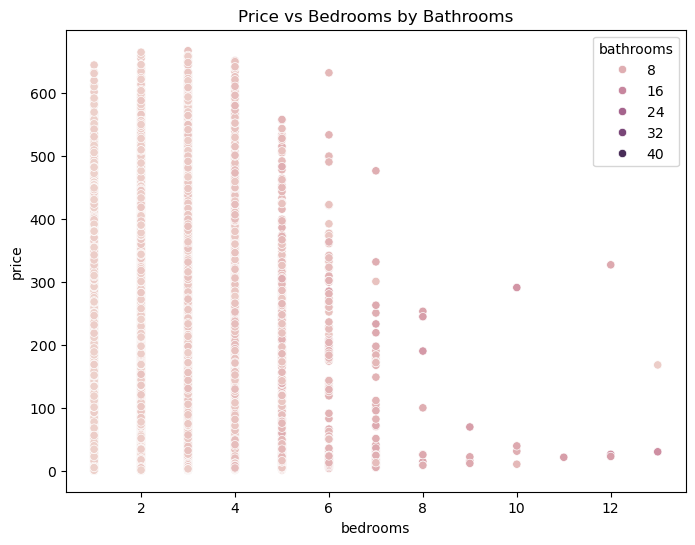

In [594]:
#7)How do bedrooms, bathrooms, and price relate?
# x: bedrooms (numeric)
# y: price (numeric)
# color: bathrooms (numeric)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="bedrooms", y="price", hue="bathrooms")
plt.title("Price vs Bedrooms by Bathrooms")
plt.show()


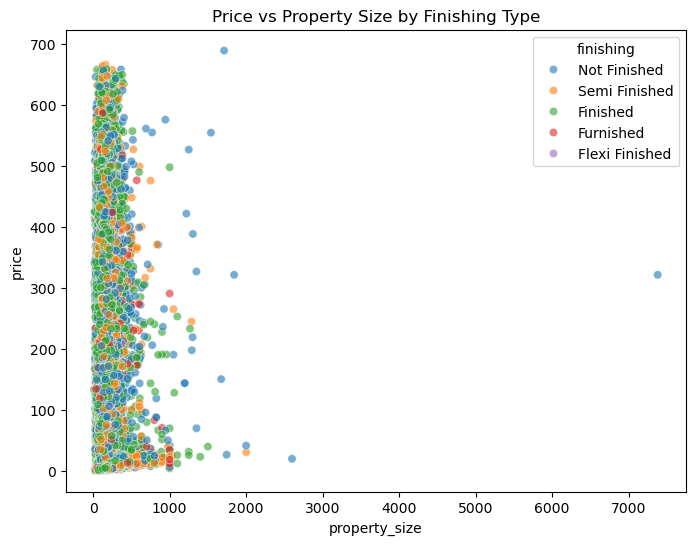

In [595]:
#8)How does finishing type affect the relationship between property size and price?
# x: property_size (numeric)
# y: price (numeric)
# color: finishing (categorical)

plt.figure(figsize=(8,6))
sns.scatterplot(x="property_size", y="price", hue="finishing", data=df, alpha=0.6)
plt.title("Price vs Property Size by Finishing Type")
plt.show()


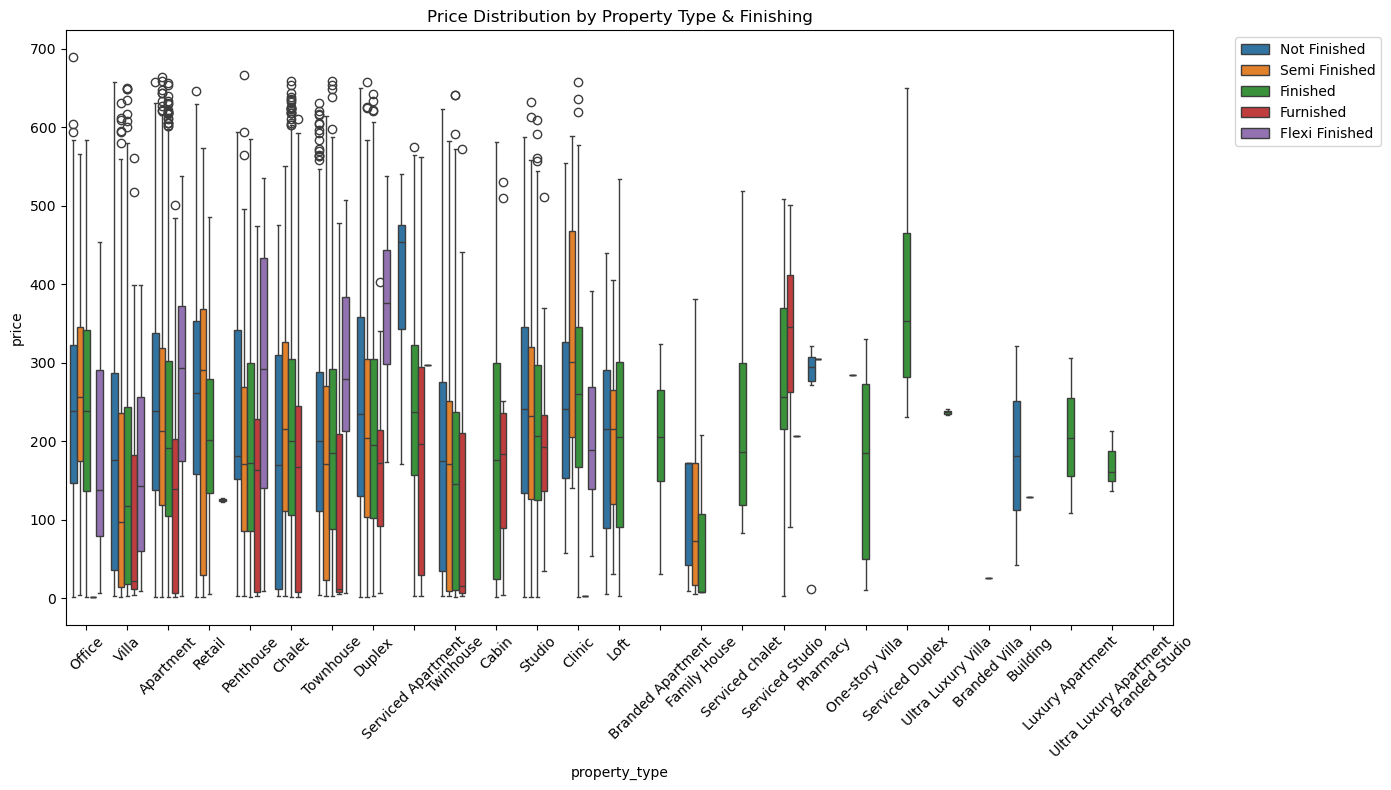

In [596]:
# 9) What is the relationship among property type, finishing type, and price?
# x: property_type (categorical)
# y: price (numeric)
# color: finishing (categorical)

plt.figure(figsize=(14,8))
sns.boxplot(x="property_type", y="price", hue="finishing", data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Property Type & Finishing")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



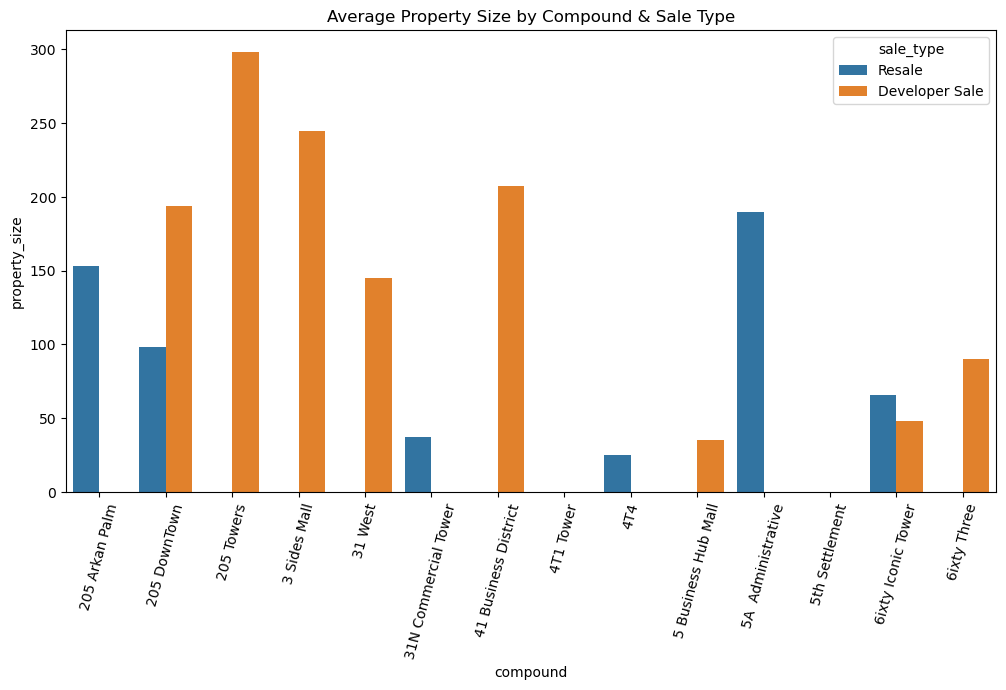

In [597]:
# 10) How do compound, sale type, and average property size interact?
# x: compound (categorical)
# y: average_property_size (numeric)
# color: sale_type (categorical)

compound_size = df.groupby(["compound", "sale_type"])["property_size"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="compound", y="property_size", hue="sale_type", data=compound_size.head(20))
plt.xticks(rotation=75)
plt.title("Average Property Size by Compound & Sale Type")
plt.show()


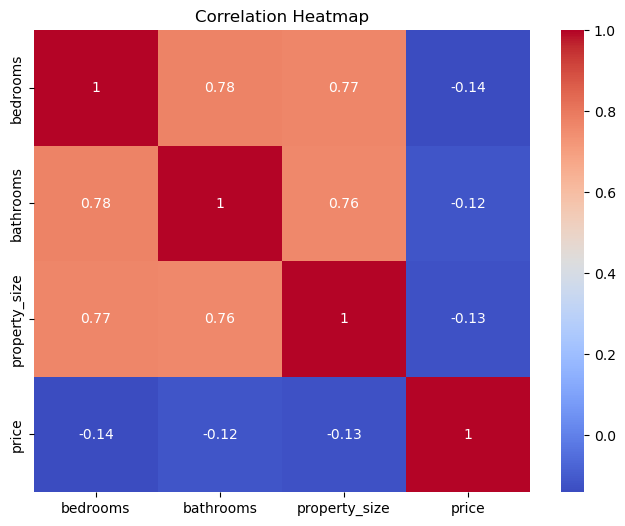

In [598]:
# 11) Which features (bedrooms, bathrooms, property size, and price) are most correlated?
# variables: bedrooms (numeric), bathrooms (numeric), property_size (numeric), price (numeric)

plt.figure(figsize=(8,6))
sns.heatmap(df[["bedrooms","bathrooms","property_size","price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

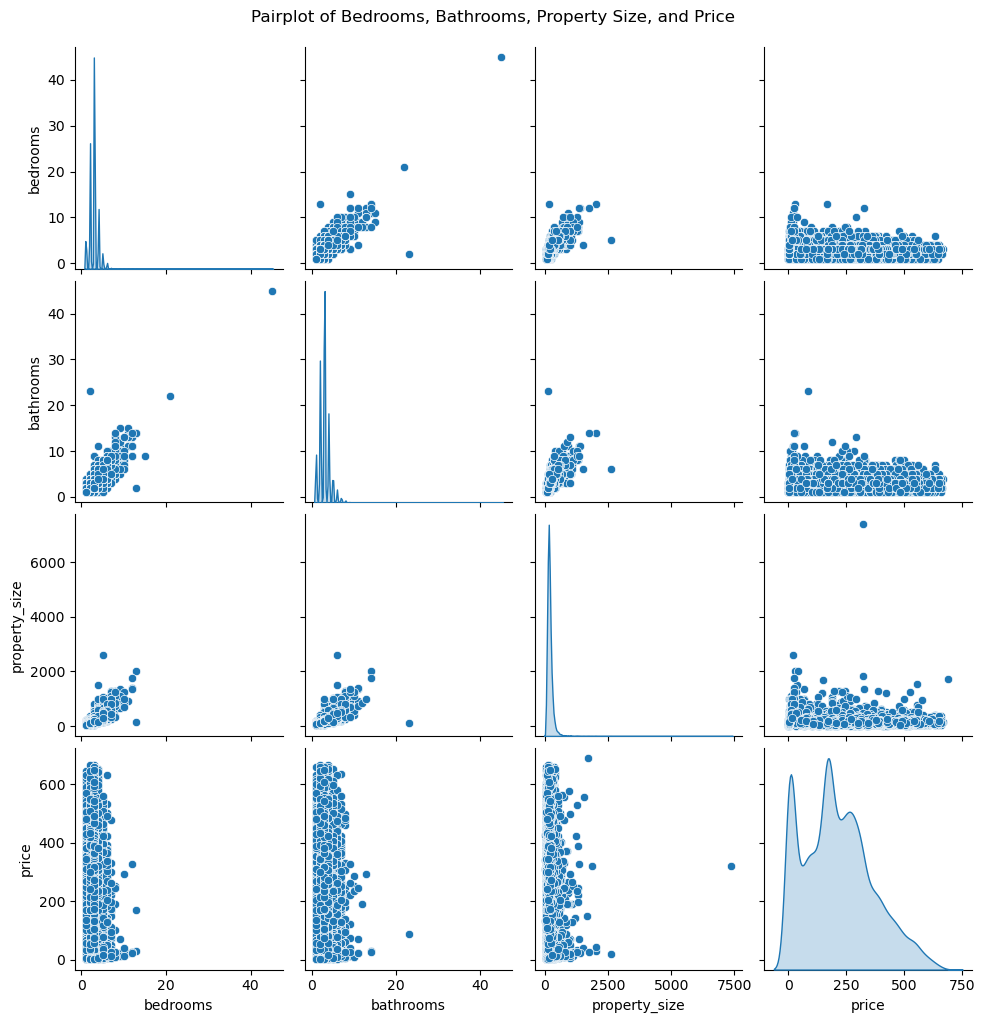

In [599]:
# 12) Which features (bedrooms, bathrooms, property size, price) are most related to each other? (pairplot)
# variables: bedrooms (numeric), bathrooms (numeric), property_size (numeric), price (numeric)

sns.pairplot(df[["bedrooms", "bathrooms", "property_size", "price"]], diag_kind="kde")
plt.suptitle("Pairplot of Bedrooms, Bathrooms, Property Size, and Price", y=1.02)
plt.show()


 #### 3) Pre-Processing Mind Map:
* A) Detect & Handle Duplicates
* B) train_test_split
* C) Detect & Handle NaNs
* D) Detect & Handle Outliers
* E) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* F) Imbalanced: X_train_resampled
* G) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled
* H)Feature Selection / Feature Engineering

In [641]:
df

url  \
0      https://www.nawy.com/compound/1572-fcc/propert...   
1      https://www.nawy.com/compound/38-hyde-park/pro...   
2      https://www.nawy.com/compound/728-lasirena-pal...   
3      https://www.nawy.com/compound/1219-nurai/prope...   
4      https://www.nawy.com/compound/260-v-residences...   
...                                                  ...   
90138  https://www.nawy.com/compound/10-mountain-view...   
90139  https://www.nawy.com/compound/544-serrano/prop...   
90140  https://www.nawy.com/compound/927-salt/propert...   
90141  https://www.nawy.com/compound/165-jefaira/prop...   
90142  https://www.nawy.com/compound/408-parklane/pro...   

                                                logo_url  \
0      https://prod-images.cooingestate.com/processed...   
1      https://prod-images.cooingestate.com/processed...   
2      https://prod-images.cooingestate.com/processed...   
3      https://prod-images.cooingestate.com/processed...   
4      https://prod-images.cooingestate.com/processed...   
...                                                  ...   
90138  https://prod-images.cooingestate.com/processed...   
90139  https://prod-images.cooingestate.com/processed...   
90140  https://prod-images.cooingestate.com/processed...   
90141  https://prod-images.cooingestate.com/processed...   
90142  https://prod-images.cooingestate.com/processed...   

                            developer_url  \
0      https://www.nawy.com/developer/125   
1       https://www.nawy.com/developer/15   
2      https://www.nawy.com/developer/215   
3      https://www.nawy.com/developer/168   
4        https://www.nawy.com/developer/8   
...                                   ...   
90138    https://www.nawy.com/developer/6   
90139  https://www.nawy.com/developer/136   
90140   https://www.nawy.com/developer/33   
90141   https://www.nawy.com/developer/13   
90142  https://www.nawy.com/developer/109   

                                  developer_name  \
0      Al - Borouj Misr Developments Group (ABM)   
1                                      Hyde Park   
2                                 Lasirena Group   
3                            Mercon Developments   
4                                          SODIC   
...                                          ...   
90138                              Mountain View   
90139                                   New Plan   
90140                               Tatweer Misr   
90141                              Inertia Egypt   
90142                           El Attal Holding   

                                          property_title property_type  \
0      Office for sale in FCC in Golden Square by Al ...        Office   
1      Villa 4 bedrooms for resale in Hyde Park in Ne...         Villa   
2      Apartment for sale in Lasirena Palm Beach with...     Apartment   
3      Retail for sale in Nurai - Nurai Walk - in New...        Retail   
4      Penthouse 4 bedrooms for resale in V Residence...     Penthouse   
...                                                  ...           ...   
90138  Townhouse for sale in Mountain View October Pa...     Townhouse   
90139      Serrano - Apartment - 1 bedroom -ground floor     Apartment   
90140  Chalet for sale in Salt with 3 bedrooms in Nor...        Chalet   
90141  Chalet for sale in Jefaira with 4 bedrooms in ...        Chalet   
90142                                    Parklane-Office        Office   

                                                location reference_no  \
0                              FCC, Golden Square, Egypt        83320   
1                            Hyde Park, New Cairo, Egypt         7004   
2                 Lasirena Palm Beach, Ain Sokhna, Egypt        31976   
3                                 Nurai, El Lotus, Egypt        63905   
4         V Residences By Villette, Golden Square, Egypt        75110   
...                                                  ...          ...   
90138  Mountain View October Park, 6th of Oct

In [621]:
#a) Detect & Handle Duplicates
df.duplicated().sum()

np.int64(0)

In [622]:
df.drop_duplicates(inplace=True)

In [ ]:
#b) train_test_split
from sklearn.model_selection import train_test_split

# Drop columns that are not useful as features (urls, text, reference_no, etc.)
X = df.drop([ 'url', 'logo_url', 'developer_url', 
              'property_title', 'amenities', 'reference_no','price'], axis=1)

# Target variable (what we want to predict)
y = df['price']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Check dataset sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((71908, 11), (17978, 11), (71908,), (17978,))

In [659]:
#c) Detect & Handle NaNs
X_train.isna().sum()

developer_name       99
property_type       160
location            160
bedrooms          11250
bathrooms         13944
compound            160
sale_type           160
finishing          1200
price             57126
delivery_in           0
property_size     57143
dtype: int64

In [660]:
X_train.columns

Index(['developer_name', 'property_type', 'location', 'bedrooms', 'bathrooms',
       'compound', 'sale_type', 'finishing', 'price', 'delivery_in',
       'property_size'],
      dtype='object')

In [661]:
df.dtypes


url                object
logo_url           object
developer_url      object
developer_name     object
property_title     object
property_type      object
location           object
reference_no       object
bedrooms          float64
bathrooms         float64
compound           object
sale_type          object
finishing          object
price             float64
amenities          object
delivery_in         int64
property_size     float64
dtype: object

In [662]:
from sklearn.impute import SimpleImputer, KNNImputer



# Numeric columns → median
num_cols = ['bedrooms', 'bathrooms', 'delivery_in', 'property_size',]
median_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = median_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = median_imputer.transform(X_test[num_cols])
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

# Categorical columns → most frequent
cat_cols = ['developer_name', 'property_type', 'location', 'compound', 'sale_type', 'finishing']
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])



In [ ]:
X_train['delivery_in'] = X_train['delivery_in'].astype(int)
X_test['delivery_in'] = X_test['delivery_in'].astype(int)

# bedrooms & bathrooms can safely remain float, but if you prefer int:
X_train[['bedrooms', 'bathrooms']] = X_train[['bedrooms', 'bathrooms']].astype(int)
X_test[['bedrooms', 'bathrooms']] = X_test[['bedrooms', 'bathrooms']].astype(int)

In [664]:
X_train.isna().sum()

developer_name        0
property_type         0
location              0
bedrooms              0
bathrooms             0
compound              0
sale_type             0
finishing             0
price             57126
delivery_in           0
property_size         0
dtype: int64

In [665]:
#d) Detect & Handle Outliers
X_train

developer_name property_type  \
36792                    Emaar Misr     Apartment   
44202                 Mountain View     Apartment   
5767                      Hyde Park         Villa   
22781               People & Places        Studio   
931                  Ora Developers         Villa   
...                             ...           ...   
6265                   Madinet Masr         Villa   
54950  Al Ahly Sabbour Developments     Apartment   
77011                           LMD         Villa   
860                 People & Places     Penthouse   
15796       Palm Hills Developments         Villa   

                                                location  bedrooms  bathrooms  \
36792                      Uptown Cairo, Mokattam, Egypt         3          2   
44202          Mountain View Hyde Park, New Cairo, Egypt         3          3   
5767            Garden Lakes, 6th of October City, Egypt         3          4   
22781                     Hills of One, New Zayed, Egypt         3          1   
931                    Silversands , Sidi Heneish, Egypt         5          5   
...                                                  ...       ...        ...   
6265                             Sarai, New Cairo, Egypt         3          3   
54950         The City of Odyssia, Mostakbal City, Egypt         3          3   
77011                          Stei8ht, New Cairo, Egypt         4          5   
860    Le Gray Beach Hotel and Residences, Ras El Hek...         3          3   
15796  Palm Hills Golf Extension, 6th of October City...         4          5   

                                 compound       sale_type      finishing  \
36792                        Uptown Cairo  Developer Sale       Finished   
44202             Mountain View Hyde Park          Resale   Not Finished   
5767                         Garden Lakes  Developer Sale   Not Finished   
22781                        Hills of One  Developer Sale       Finished   
931                           Silversands          Resale       Finished   
...                                   ...             ...            ...   
6265                                Sarai          Resale  Semi Finished   
54950                 The City of Odyssia  Developer Sale  Semi Finished   
77011                             Stei8ht  Developer Sale       Finished   
860    Le Gray Beach Hotel and Residences  Developer Sale       Finished   
15796           Palm Hills Golf Extension          Resale       Finished   

            price  delivery_in  property_size  
36792         NaN         2027          160.0  
44202         NaN         2027          160.0  
5767          NaN         2027          160.0  
22781         NaN         2028          160.0  
931           NaN         2026          160.0  
...           ...          ...            ...  
6265   339.666667         2028          198.0  
54950         NaN         2027          160.0  
77011         NaN         2025          160.0  
860           NaN         2027          160.0  
15796         NaN         2027          160.0  

[71908 rows x 11 columns]

<Axes: ylabel='property_size'>

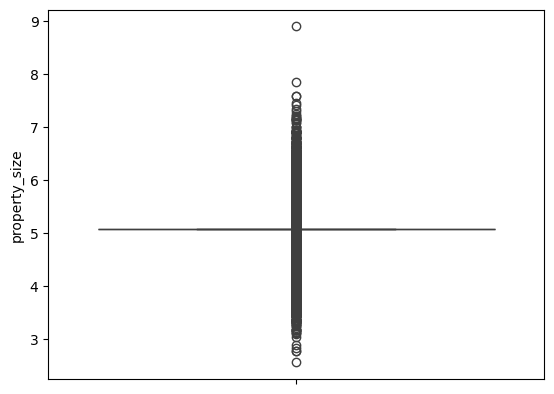

In [ ]:

X_train[['bedrooms', 'bathrooms', 'delivery_in', 'property_size']] = np.log1p(X_train[['bedrooms', 'bathrooms', 'delivery_in', 'property_size']])
X_test[['bedrooms', 'bathrooms', 'delivery_in', 'property_size']] = np.log1p(X_test[['bedrooms', 'bathrooms', 'delivery_in', 'property_size']])

sns.boxplot(X_train['property_size'])

<Axes: xlabel='property_size', ylabel='Count'>

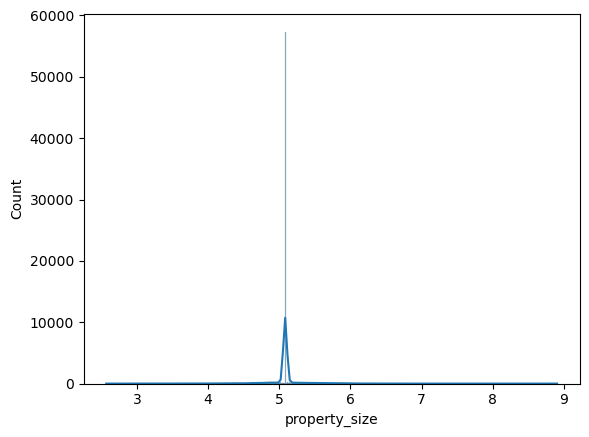

In [667]:
# Distribution plot
sns.histplot(X_train['property_size'], kde=True)

In [ ]:
#e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
cat_cols = X_train.select_dtypes("O").columns
for col in cat_cols:
    print(col, X_train[col].nunique())

developer_name 287
property_type 26
location 1268
compound 1268
sale_type 3
finishing 5


In [ ]:
cat_cols = X_train.select_dtypes("O").columns
from category_encoders import BinaryEncoder
bin_encoder = BinaryEncoder()
X_train_encoded = pd.concat([X_train, bin_encoder.fit_transform(X_train[cat_cols])], axis=1).drop(cat_cols, axis=1)
X_test_encoded = pd.concat([X_test, bin_encoder.transform(X_test[cat_cols])], axis=1).drop(cat_cols, axis=1)



In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Standard scaling for normally distributed numerical columns
std_scaler = StandardScaler()
X_train_encoded[["bedrooms", "bathrooms", "delivery_in"]] = std_scaler.fit_transform(X_train_encoded[["bedrooms", "bathrooms", "delivery_in"]])
X_test_encoded[["bedrooms", "bathrooms", "delivery_in"]] = std_scaler.transform(X_test_encoded[["bedrooms", "bathrooms", "delivery_in"]])

# Robust scaling for columns that might have outliers
robust_scaler = RobustScaler()
X_train_encoded[["property_size"]] = robust_scaler.fit_transform(X_train_encoded[["property_size"]])
X_test_encoded[["property_size"]] = robust_scaler.transform(X_test_encoded[["property_size"]])

In [678]:
X_train_encoded

bedrooms  bathrooms       price  delivery_in  property_size  \
36792  0.248570  -0.906489         NaN     0.006299         0.0000   
44202  0.248570   0.160021         NaN     0.006299         0.0000   
5767   0.248570   0.987270         NaN     0.006299         0.0000   
22781  0.248570  -2.409651         NaN     0.770748         0.0000   
931    1.919133   1.663182         NaN    -0.758527         0.0000   
...         ...        ...         ...          ...            ...   
6265   0.248570   0.160021  339.666667     0.770748         0.2119   
54950  0.248570   0.160021         NaN     0.006299         0.0000   
77011  1.167947   1.663182         NaN    -1.523730         0.0000   
860    0.248570   0.160021         NaN     0.006299         0.0000   
15796  1.167947   1.663182         NaN     0.006299         0.0000   

       developer_name_0  developer_name_1  developer_name_2  developer_name_3  \
36792                 0                 0                 0                 0   
44202                 0                 0                 0                 0   
5767                  0                 0                 0                 0   
22781                 0                 0                 0                 0   
931                   0                 0                 0                 0   
...                 ...               ...               ...               ...   
6265                  0                 0                 0                 0   
54950                 0                 0                 0                 0   
77011                 0                 0                 0                 1   
860                   0                 0                 0                 0   
15796                 0                 0                 0                 0   

       developer_name_4  ...  compound_6  compound_7  compound_8  compound_9  \
36792                 0  ...           0           0           0           0   
44202                 0  ...           0           0           0           1   
5767                  0  ...           0           0           0           1   
22781                 0  ...           0           0           1           0   
931                   0  ...           0           0           1           0   
...                 ...  ...         ...         ...         ...         ...   
6265                  1  ...           1           1           1           0   
54950                 0  ...           1           0           0           1   
77011                 1  ...           0           1           1           1   
860                   0  ...           0           0           0           0   
15796                 1  ...           0           0           1           1   

       compound_10  sale_type_0  sale_type_1  finishing_0  finishing_1  \
36792            1            0            1            0            0   
44202            0            1            0            0            1   
5767             1            0            1            0            1   
22781            0            0            1            0            0   
931              1            1            0            0            0   
...            ...          ...          ...          ...          ...   
6265             0            1            0            1            0   
54950            1            0            1            1            0   
77011            1            0            1            0            0   
860              0            0            1            0            0   
15796            1            1            0            0            0   

       finishing_2  
36792            1  
44202            0  
5767             0  
22781            1  
931              1  
...            ...  
6265             0  
54950            0  
77011            1  
860              1  
15796            1  

[71908 rows x 46 columns]

In [679]:
X_train_encoded.describe()

bedrooms     bathrooms         price   delivery_in  property_size  \
count  7.190800e+04  7.190800e+04  14782.000000  7.190800e+04   71908.000000   
mean  -3.132364e-16 -1.511835e-16    213.041109 -5.053276e-13      -0.002964   
std    1.000007e+00  1.000007e+00    148.361158  1.000007e+00       0.238041   
min   -2.607276e+00 -2.409651e+00      0.666667 -1.523730e+00      -2.516455   
25%   -9.367134e-01 -9.064892e-01     97.666667  6.299371e-03       0.000000   
50%    2.485699e-01  1.600209e-01    197.333333  6.299371e-03       0.000000   
75%    2.485699e-01  1.600209e-01    305.333333  6.299371e-03       0.000000   
max    1.031132e+01  9.214418e+00    666.333333  3.777447e+01       3.825531   

       developer_name_0  developer_name_1  developer_name_2  developer_name_3  \
count      71908.000000      71908.000000      71908.000000       71908.00000   
mean           0.000751          0.039078          0.144490           0.27588   
std            0.027394          0.193781          0.351589           0.44696   
min            0.000000          0.000000          0.000000           0.00000   
25%            0.000000          0.000000          0.000000           0.00000   
50%            0.000000          0.000000          0.000000           0.00000   
75%            0.000000          0.000000          0.000000           1.00000   
max            1.000000          1.000000          1.000000           1.00000   

       developer_name_4  ...    compound_6    compound_7    compound_8  \
count      71908.000000  ...  71908.000000  71908.000000  71908.000000   
mean           0.456208  ...      0.510277      0.502364      0.458864   
std            0.498082  ...      0.499898      0.499998      0.498308   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%            0.000000  ...      0.000000      0.000000      0.000000   
50%            0.000000  ...      1.000000      1.000000      0.000000   
75%            1.000000  ...      1.000000      1.000000      1.000000   
max            1.000000  ...      1.000000      1.000000      1.000000   

         compound_9   compound_10   sale_type_0   sale_type_1   finishing_0  \
count  71908.000000  71908.000000  71908.000000  71908.000000  71908.000000   
mean       0.441300      0.469697      0.232728      0.780873      0.153474   
std        0.496546      0.499084      0.422573      0.413658      0.360446   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        1.000000      1.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        finishing_1   finishing_2  
count  71908.000000  71908.000000  
mean       0.357679      0.508553  
std        0.479320      0.499930  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 46 columns]

In [687]:
imputer = SimpleImputer(strategy="median")
X_train_encoded = pd.DataFrame(imputer.fit_transform(X_train_encoded),
                               columns=X_train_encoded.columns)
X_test_encoded = pd.DataFrame(imputer.transform(X_test_encoded),
                              columns=X_test_encoded.columns)

In [688]:
# X_train_encoded.to_csv("train_cleaned_encoded.csv", index=False)
# X_test_encoded.to_csv("test_cleaned_encoded.csv", index=False)

In [689]:
#f) Imbalanced: X_train_resampled
# Skipped — Imbalance handling like RandomOverSampler 
# works only for classification (categorical y).
# Since 'price' is continuous, no resampling is applied.

In [690]:
#g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled
from sklearn.preprocessing import StandardScaler, RobustScaler

# Standard scaling for normal-like columns
std_scaling_cols = ["bedrooms", "bathrooms", "delivery_in"]
std_scaler = StandardScaler()
X_train_encoded[std_scaling_cols] = std_scaler.fit_transform(X_train_encoded[std_scaling_cols])
X_test_encoded[std_scaling_cols] = std_scaler.transform(X_test_encoded[std_scaling_cols])

# Robust scaling for skewed columns (property_size)
robust_scaling_cols = ["property_size"]
robust_scaler = RobustScaler()
X_train_encoded[robust_scaling_cols] = robust_scaler.fit_transform(X_train_encoded[robust_scaling_cols])
X_test_encoded[robust_scaling_cols] = robust_scaler.transform(X_test_encoded[robust_scaling_cols])


In [ ]:
#h)Feature Selection / Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression

# Keep the top 15 features most correlated with target (price)
selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_encoded, y_train)
X_test_selected = selector.transform(X_test_encoded)

# Get selected feature names
selected_features = X_train_encoded.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['bedrooms', 'bathrooms', 'delivery_in', 'property_size',
       'developer_name_2', 'developer_name_6', 'developer_name_7',
       'property_type_3', 'property_type_4', 'location_1', 'location_5',
       'compound_1', 'compound_5', 'sale_type_1', 'finishing_2'],
      dtype='object')


#### Streamlit


In [698]:
df

url  \
0      https://www.nawy.com/compound/1572-fcc/propert...   
1      https://www.nawy.com/compound/38-hyde-park/pro...   
2      https://www.nawy.com/compound/728-lasirena-pal...   
3      https://www.nawy.com/compound/1219-nurai/prope...   
4      https://www.nawy.com/compound/260-v-residences...   
...                                                  ...   
90138  https://www.nawy.com/compound/10-mountain-view...   
90139  https://www.nawy.com/compound/544-serrano/prop...   
90140  https://www.nawy.com/compound/927-salt/propert...   
90141  https://www.nawy.com/compound/165-jefaira/prop...   
90142  https://www.nawy.com/compound/408-parklane/pro...   

                                                logo_url  \
0      https://prod-images.cooingestate.com/processed...   
1      https://prod-images.cooingestate.com/processed...   
2      https://prod-images.cooingestate.com/processed...   
3      https://prod-images.cooingestate.com/processed...   
4      https://prod-images.cooingestate.com/processed...   
...                                                  ...   
90138  https://prod-images.cooingestate.com/processed...   
90139  https://prod-images.cooingestate.com/processed...   
90140  https://prod-images.cooingestate.com/processed...   
90141  https://prod-images.cooingestate.com/processed...   
90142  https://prod-images.cooingestate.com/processed...   

                            developer_url  \
0      https://www.nawy.com/developer/125   
1       https://www.nawy.com/developer/15   
2      https://www.nawy.com/developer/215   
3      https://www.nawy.com/developer/168   
4        https://www.nawy.com/developer/8   
...                                   ...   
90138    https://www.nawy.com/developer/6   
90139  https://www.nawy.com/developer/136   
90140   https://www.nawy.com/developer/33   
90141   https://www.nawy.com/developer/13   
90142  https://www.nawy.com/developer/109   

                                  developer_name  \
0      Al - Borouj Misr Developments Group (ABM)   
1                                      Hyde Park   
2                                 Lasirena Group   
3                            Mercon Developments   
4                                          SODIC   
...                                          ...   
90138                              Mountain View   
90139                                   New Plan   
90140                               Tatweer Misr   
90141                              Inertia Egypt   
90142                           El Attal Holding   

                                          property_title property_type  \
0      Office for sale in FCC in Golden Square by Al ...        Office   
1      Villa 4 bedrooms for resale in Hyde Park in Ne...         Villa   
2      Apartment for sale in Lasirena Palm Beach with...     Apartment   
3      Retail for sale in Nurai - Nurai Walk - in New...        Retail   
4      Penthouse 4 bedrooms for resale in V Residence...     Penthouse   
...                                                  ...           ...   
90138  Townhouse for sale in Mountain View October Pa...     Townhouse   
90139      Serrano - Apartment - 1 bedroom -ground floor     Apartment   
90140  Chalet for sale in Salt with 3 bedrooms in Nor...        Chalet   
90141  Chalet for sale in Jefaira with 4 bedrooms in ...        Chalet   
90142                                    Parklane-Office        Office   

                                                location reference_no  \
0                              FCC, Golden Square, Egypt        83320   
1                            Hyde Park, New Cairo, Egypt         7004   
2                 Lasirena Palm Beach, Ain Sokhna, Egypt        31976   
3                                 Nurai, El Lotus, Egypt        63905   
4         V Residences By Villette, Golden Square, Egypt        75110   
...                                                  ...          ...   
90138  Mountain View October Park, 6th of Oct

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Page configuration
st.set_page_config(
    page_title="Property Analysis Dashboard",
    page_icon="🏠",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Load and clean your property data
@st.cache_data
def load_and_clean_data():
    try:
        # Load the data
        df = pd.read_csv('property_data_08152025_v2.csv')
        
        # Data cleaning
        df_clean = df.copy()
        
        # Clean price column if it exists
        if 'price' in df_clean.columns:
            # Convert price to string first, then clean
            df_clean['price'] = df_clean['price'].astype(str)
            
            # Remove common non-numeric patterns
            df_clean['price'] = df_clean['price'].str.replace(',', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('EGP', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('$', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('Call for price', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('Negotiable', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('N/A', '', regex=False)
            df_clean['price'] = df_clean['price'].str.replace('nan', '', regex=False)
            df_clean['price'] = df_clean['price'].str.strip()
            
            # Replace empty strings with NaN
            df_clean['price'] = df_clean['price'].replace('', np.nan)
            
            # Convert to numeric, errors='coerce' will convert invalid values to NaN
            df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
        
        # Clean property_size column if it exists
        if 'property_size' in df_clean.columns:
            df_clean['property_size'] = df_clean['property_size'].astype(str)
            df_clean['property_size'] = df_clean['property_size'].str.replace('sqm', '', regex=False)
            df_clean['property_size'] = df_clean['property_size'].str.replace('m²', '', regex=False)
            df_clean['property_size'] = df_clean['property_size'].str.replace(',', '', regex=False)
            df_clean['property_size'] = df_clean['property_size'].str.strip()
            df_clean['property_size'] = df_clean['property_size'].replace('', np.nan)
            df_clean['property_size'] = pd.to_numeric(df_clean['property_size'], errors='coerce')
        
        # Clean other numeric columns
        numeric_columns = ['bedrooms', 'bathrooms', 'floors']
        for col in numeric_columns:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        return df_clean
        
    except FileNotFoundError:
        st.error("⚠️ Data file not found! Please make sure 'property_data_08152025_v2.csv' is in the same folder.")
        return None
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return None

# Load data
df = load_and_clean_data()

# Only proceed if data is loaded successfully
if df is not None:
    # Sidebar navigation
    st.sidebar.title("🏠 Property Analysis App")
    page_option = st.sidebar.radio(
        label='Navigate to:', 
        options=['Data Explorer', 'Interactive Plots']
    )

    def data_page():
        st.title("🏠 Property Data Explorer")
        st.write("### Overview of Egyptian Property Market Data")
        
        # Show basic info with error handling
        col1, col2, col3, col4 = st.columns(4)
        
        with col1:
            st.metric("Total Properties", f"{len(df):,}")
        
        with col2:
            if 'property_type' in df.columns:
                st.metric("Property Types", df['property_type'].nunique())
            else:
                st.metric("Property Types", "N/A")
        
        with col3:
            if 'price' in df.columns:
                # Use only valid (non-NaN) prices for calculation
                valid_prices = df['price'].dropna()
                if len(valid_prices) > 0:
                    avg_price = valid_prices.mean()
                    st.metric("Average Price", f"{avg_price:,.0f} EGP")
                    st.caption(f"Based on {len(valid_prices):,} valid prices")
                else:
                    st.metric("Average Price", "N/A")
                    st.caption("No valid price data found")
            else:
                st.metric("Average Price", "N/A")
        
        with col4:
            if 'property_size' in df.columns:
                # Use only valid (non-NaN) sizes for calculation
                valid_sizes = df['property_size'].dropna()
                if len(valid_sizes) > 0:
                    avg_size = valid_sizes.mean()
                    st.metric("Average Size", f"{avg_size:.0f} sqm")
                    st.caption(f"Based on {len(valid_sizes):,} valid sizes")
                else:
                    st.metric("Average Size", "N/A")
                    st.caption("No valid size data found")
            else:
                st.metric("Average Size", "N/A")
        
        # Show data quality info
        st.write("### Data Quality Overview")
        if 'price' in df.columns:
            total_rows = len(df)
            valid_prices = df['price'].notna().sum()
            invalid_prices = total_rows - valid_prices
            
            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Total Rows", f"{total_rows:,}")
            with col2:
                st.metric("Valid Prices", f"{valid_prices:,}")
            with col3:
                st.metric("Missing/Invalid Prices", f"{invalid_prices:,}")
        
        # Show dataset overview
        st.write("### Dataset Overview")
        st.write(f"**Rows:** {df.shape[0]:,} | **Columns:** {df.shape[1]}")
        
        # Show column info with data types
        st.write("### Available Columns")
        col_info = pd.DataFrame({
            'Column': df.columns,
            'Data Type': df.dtypes,
            'Non-Null Count': df.count(),
            'Null Count': df.isnull().sum()
        })
        st.dataframe(col_info)
        
        # Show sample data
        st.write("### Sample Data")
        st.dataframe(df.head())
        
        # Property type distribution
        if 'property_type' in df.columns:
            st.write("### Property Type Distribution")
            prop_counts = df['property_type'].value_counts()
            
            col1, col2 = st.columns(2)
            with col1:
                st.dataframe(prop_counts.head(10))
            with col2:
                fig = px.pie(values=prop_counts.values, names=prop_counts.index, 
                           title="Property Types Distribution")
                st.plotly_chart(fig, use_container_width=True)
        
        # Filter options
        if 'property_type' in df.columns:
            st.write("### Filter and Explore")
            property_types = st.multiselect(
                "Filter by Property Type:",
                options=df['property_type'].unique(),
                default=df['property_type'].unique()[:min(3, len(df['property_type'].unique()))]
            )
            
            if property_types:  # Only filter if something is selected
                # Apply filters
                filtered_df = df[df['property_type'].isin(property_types)]
                
                # Show filtered data
                display_columns = []
                for col in ['property_type', 'location', 'bedrooms', 'bathrooms', 'price', 'property_size', 'finishing']:
                    if col in df.columns:
                        display_columns.append(col)
                
                if display_columns:
                    st.dataframe(filtered_df[display_columns])
                
                # Summary statistics for numeric columns
                numeric_cols = filtered_df.select_dtypes(include=[np.number]).columns
                if len(numeric_cols) > 0:
                    st.write("### Summary Statistics")
                    st.dataframe(filtered_df[numeric_cols].describe())

    def plots_page():
        st.title("📊 Interactive Property Analysis")
        
        # Check available columns
        available_cols = df.columns.tolist()
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
        
        # Plot selection
        plot_type = st.selectbox(
            "Choose Analysis Type:",
            ['Price Distribution', 'Property Comparison', 'Location Analysis']
        )
        
        if plot_type == 'Price Distribution':
            st.subheader("💰 Price Analysis")
            
            if 'price' not in df.columns:
                st.error("Price column not found in the dataset!")
                return
            
            # Check if we have valid price data
            valid_price_data = df['price'].dropna()
            if len(valid_price_data) == 0:
                st.error("No valid price data found in the dataset!")
                return
            
            # X-axis selection from categorical columns
            cat_options = [col for col in ['property_type', 'finishing', 'sale_type', 'compound'] 
                          if col in categorical_cols]
            
            if cat_options:
                x_option = st.selectbox(
                    'Select Category for Analysis:', 
                    options=cat_options, 
                    index=0
                )
                
                if st.button("Show Price Distribution"):
                    # Filter out rows with missing prices
                    plot_df = df.dropna(subset=['price'])
                    
                    if len(plot_df) > 0:
                        # Create box plot
                        fig = px.box(plot_df, x=x_option, y='price', 
                                    title=f'Price Distribution by {x_option.replace("_", " ").title()}')
                        st.plotly_chart(fig, use_container_width=True)
                        
                        # Show summary stats
                        st.write(f"### Price Summary by {x_option.replace('_', ' ').title()}")
                        summary = plot_df.groupby(x_option)['price'].agg(['mean', 'median', 'count']).round(2)
                        st.dataframe(summary)
                    else:
                        st.error("No valid data available for plotting after removing missing prices.")
            else:
                st.warning("No suitable categorical columns found for price analysis.")
        
        elif plot_type == 'Property Comparison':
            st.subheader("🏠 Property Features Analysis")
            
            if 'price' not in df.columns:
                st.error("Price column not found in the dataset!")
                return
            
            # Check if we have valid price data
            valid_price_data = df['price'].dropna()
            if len(valid_price_data) == 0:
                st.error("No valid price data found in the dataset!")
                return
            
            # Multi-variable analysis
            numeric_options = [col for col in ['bedrooms', 'bathrooms', 'property_size'] 
                              if col in numeric_cols]
            color_options = [col for col in ['property_type', 'finishing', 'sale_type'] 
                            if col in categorical_cols]
            
            if numeric_options and color_options:
                x_var = st.selectbox('X-axis:', numeric_options)
                color_var = st.selectbox('Color by:', color_options)
                
                if st.button("Show Comparison"):
                    # Filter out rows with missing data
                    plot_df = df.dropna(subset=['price', x_var])
                    
                    if len(plot_df) > 0:
                        hover_cols = [col for col in ['location', 'compound'] if col in df.columns]
                        fig = px.scatter(plot_df, x=x_var, y='price', color=color_var,
                                       title=f'Price vs {x_var.title()} (Colored by {color_var.replace("_", " ").title()})',
                                       hover_data=hover_cols)
                        st.plotly_chart(fig, use_container_width=True)
                    else:
                        st.error("No valid data available for plotting after removing missing values.")
            else:
                st.warning("Insufficient columns for property comparison.")
        
        elif plot_type == 'Location Analysis':
            st.subheader("📍 Location-Based Analysis")
            
            if 'location' not in df.columns:
                st.error("Location column not found in the dataset!")
                return
            
            # Extract city from location
            df_temp = df.copy()
            df_temp['city'] = df_temp['location'].str.split(',').str[1].str.strip()
            
            # Top cities by property count
            top_cities = df_temp['city'].value_counts().head(10)
            
            col1, col2 = st.columns(2)
            
            with col1:
                st.write("### Top Cities by Property Count")
                fig1 = px.bar(x=top_cities.index, y=top_cities.values,
                             title='Properties per City')
                st.plotly_chart(fig1, use_container_width=True)
            
            with col2:
                if 'price' in df.columns:
                    # Filter for valid prices before calculating city averages
                    df_temp_valid = df_temp.dropna(subset=['price'])
                    if len(df_temp_valid) > 0:
                        st.write("### Average Price by City")
                        city_prices = df_temp_valid.groupby('city')['price'].mean().sort_values(ascending=False).head(10)
                        fig2 = px.bar(x=city_prices.index, y=city_prices.values,
                                     title='Average Price per City')
                        st.plotly_chart(fig2, use_container_width=True)
                    else:
                        st.write("No valid price data available for city analysis.")
                else:
                    st.write("Price column not available for city analysis.")

    # Page routing
    if page_option == 'Data Explorer':
        data_page()
    elif page_option == 'Interactive Plots':
        plots_page()

    # Footer
    st.sidebar.markdown("---")
    st.sidebar.markdown("Built with ❤️ using Streamlit")
    st.sidebar.markdown("Property Data Analysis Dashboard")

else:
    st.title("❌ Data Loading Error")
    st.write("Please check:")
    st.write("1. Make sure your CSV file exists")
    st.write("2. Check the file path and name")
    st.write("3. Ensure the file is not corrupted")

2025-08-22 23:18:19.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.115 No runtime found, using MemoryCacheStorageManager
2025-08-22 23:18:19.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-22 23:18:19.331 Thread 'MainThread':

In [720]:
import numpy as pkg
pkg.__version__

'2.3.1'